## Importing necessary libraries

In [465]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

## Defining file path before loading

In [466]:
file = "C:/Users/kasoju/Desktop/KASOJU/PGDSBA/statistics\Axisinsurance.csv"

### Loading the data file in to pandad dataframe

In [467]:
# load the data to dataframe
axis = pd.read_csv(file)

### View the first and last 5 rows of the dataset.

In [468]:
# viewing top 5 rows of data
axis.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [451]:
# viewing last 5 rows
axis.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Give a statistical summary for the dataset.

In [452]:
# checking the total num of rows and columns in data
axis.shape

(1338, 7)

In [453]:
# Checking descriptive statistics part to understand data
axis.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


the above info shows the statistical summary of data set. we can the minimum age is 18 and max age is 64 where the mean/average is 39 and mean of bmi is 30.66 and mean charges is 13270.4

In [454]:
# check the data info to know datatypes
axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Coverting object data types to category

In [456]:
axis["sex"] = axis["sex"].astype("category")
axis["smoker"] = axis["smoker"].astype("category")
axis["region"] = axis["region"].astype("category")

we converted datatypes objects to category to reduce the dataset size which helps system to perform fast.

In [457]:
axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [458]:
# viewing data description including ctaegory data
axis.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* this indicates we have more males in the dataset
* people who dont smoke are higher than people who smoke
* majority of customers/claims are from southeast region

### Checking for missing values

In [285]:
axis.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA

In [459]:
# trying to see distribution of age by grouping with sex
sex_df = axis[['sex', 'age']]
sex_df['Mean_Age'] = sex_df['age']

sex_df.\
groupby(['sex'], as_index = True).\
agg({'age' : 'median',
    'Mean_Age' : 'mean'})

<ipython-input-459-6dd00deb7b7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_df['Mean_Age'] = sex_df['age']


,age,Mean_Age
sex,,
female,40,39.503021
male,39,38.917160


In [460]:
# trying to see distribution of bmi by grouping with sex
bmi = axis[['sex', 'bmi']]
bmi['Mean_bmi'] = bmi['bmi']

bmi.\
groupby(['sex'], as_index = True).\
agg({'bmi' : 'median',
    'Mean_bmi' : 'mean'})

<ipython-input-460-edb6b325f276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi['Mean_bmi'] = bmi['bmi']


,bmi,Mean_bmi
sex,,
female,30.1075,30.377749
male,30.6875,30.943129


In [461]:
axis.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Univariate Analysis for each variable to understand the data distribution.

### Observations on age

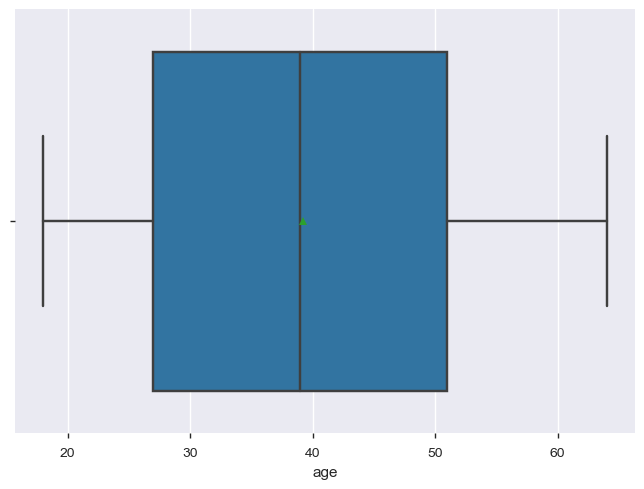

In [469]:
# boxplot visualization for variable age
sns.boxplot(axis["age"], showmeans=True)

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

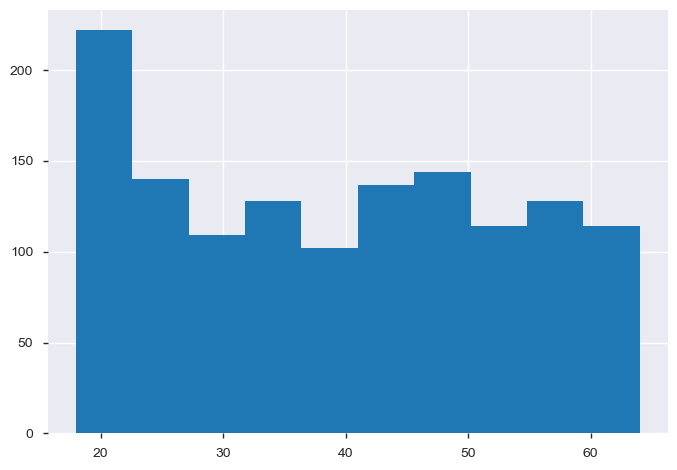

In [470]:
# histogram for age data
plt.hist(axis["age"])

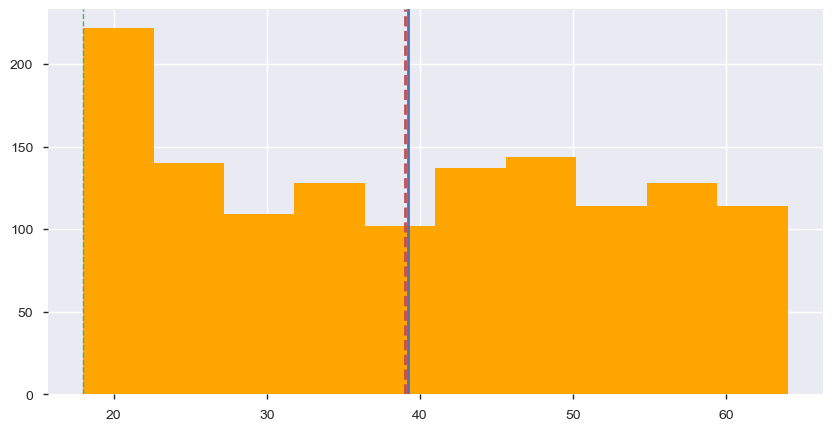

In [471]:
# checking all mean, median, mode in histogram using axvline in histogram
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(axis['age'], color='orange') # plots a simple histogram
plt.axvline(axis['age'].mean(), color='b', linewidth=2)
plt.axvline(axis['age'].median(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(axis['age'].mode()[0], color='g', linestyle='dashed', linewidth=1)

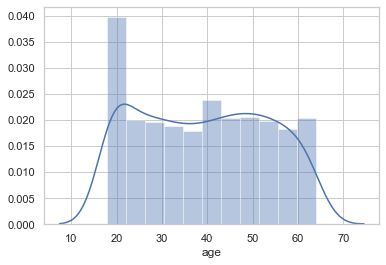

In [312]:
sns.distplot(axis['age'])

In [437]:
axis['age'].skew()

0.05567251565299186

In [346]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on sex

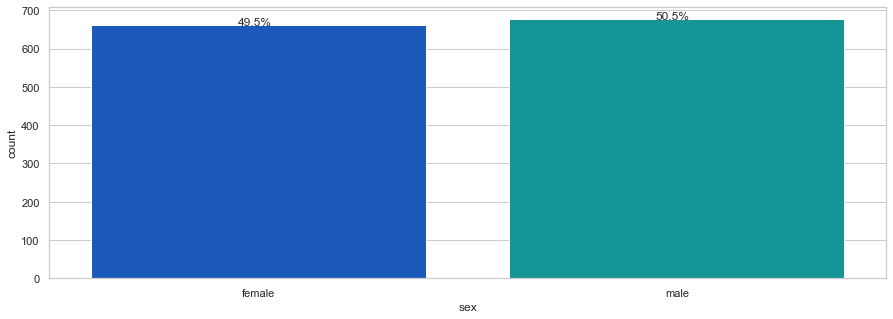

In [347]:
# using count plot to visualize the total no of males and females in data
plt.figure(figsize=(15,5))
ax = sns.countplot(axis["sex"],palette='winter')
perc_on_bar(ax,axis["sex"])

* from the above observations from gender we can see males are higher in number of claims

In [388]:
# checking mean charges for males and females by grouping by sex
gender = axis[['sex', 'charges']]
gender['Mean_charges'] = gender['charges']

gender.\
groupby(['sex'], as_index = True).\
agg({'charges' : 'median',
    'Mean_charges' : 'mean'})

<ipython-input-388-51cd7c24cedd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender['Mean_charges'] = gender['charges']


,charges,Mean_charges
sex,,
female,9412.96250,12569.578844
male,9369.61575,13956.751178


The mean insurance claims charges for female is 12569.578 and males is 13956.751. 

### Observation on region

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

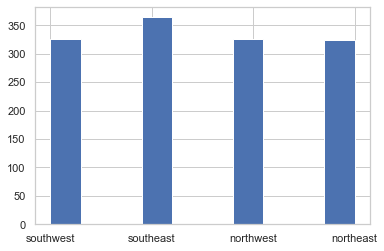

In [370]:
# histogram representation for regions
plt.hist(axis['region'])

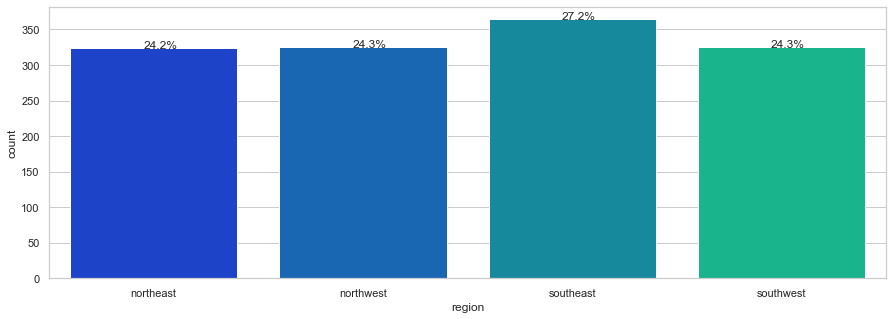

In [350]:
# graphical representation of regions and total no of count for customers/claims using countplot
plt.figure(figsize=(15,5))
ax = sns.countplot(axis["region"],palette='winter')
perc_on_bar(ax,axis["region"])

* we can see highest claims in dataset are from southeast region. and details are as follows
souteast - 27.2%
southwest - 24.3%
northwest - 24.3%
northeast - 24.2%

### Observation on Smokers

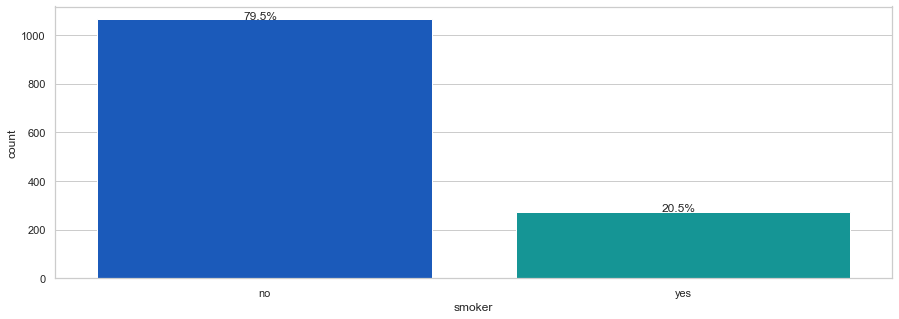

In [358]:
# graphical representation for smokers data with counts
plt.figure(figsize=(15,5))
ax = sns.countplot(axis["smoker"],palette='winter')
perc_on_bar(ax,axis["smoker"])

* it clearly shows 79.5% of the customers are non-smokers where as only 20.5% are smokers. however it doesn't mean no of claims from non-smokers are high

In [384]:
# finding out mean charges for people who smoke and son't smoke
charges = axis[['smoker', 'charges']]
charges['Mean_charges'] = charges['charges']

charges.\
groupby(['smoker'], as_index = True).\
agg({'charges' : 'median',
    'Mean_charges' : 'mean'})

<ipython-input-384-5b04bba9ebd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charges['Mean_charges'] = charges['charges']


,charges,Mean_charges
smoker,,
no,7345.40530,8434.268298
yes,34456.34845,32050.231832


* the average charges/claims for non-smokers is 8434.268298 and smokers is 32050.231832

### Observation on BMI

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

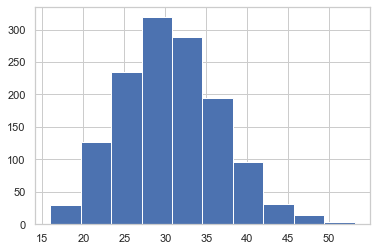

In [359]:
# histogram to see data distribution for BMI
plt.hist(axis['bmi'])

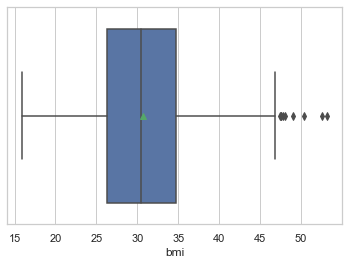

In [316]:
# visualize using box plot
sns.boxplot(axis["bmi"], showmeans=True)

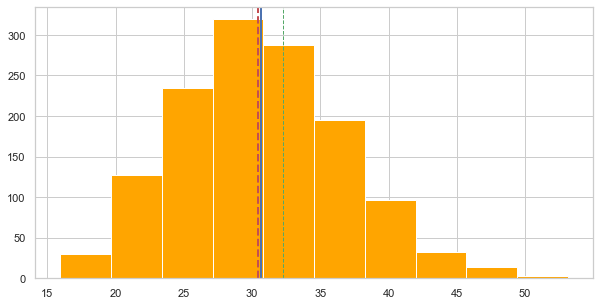

In [360]:
# plotting histogram with mean, median, mode
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(axis['bmi'], color='orange') # plots a simple histogram
plt.axvline(axis['bmi'].mean(), color='b', linewidth=2)
plt.axvline(axis['bmi'].median(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(axis['bmi'].mode()[0], color='g', linestyle='dashed', linewidth=1)

In [379]:
bmi = axis[['sex', 'bmi']]
bmi['Mean_bmi'] = bmi['bmi']

bmi.\
groupby(['sex'], as_index = True).\
agg({'bmi' : 'median',
    'Mean_bmi' : 'mean'})

<ipython-input-379-ac605f7361a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi['Mean_bmi'] = bmi['bmi']


,bmi,Mean_bmi
sex,,
female,30.1075,30.377749
male,30.6875,30.943129


* it clearly shows the mean of bmi for  females are 30.377 and males are 30.943, so there os no much difference in bmi.

In [439]:
#checking bmi skewness
axis['bmi'].skew()

0.2840471105987448

### Observation on Children

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

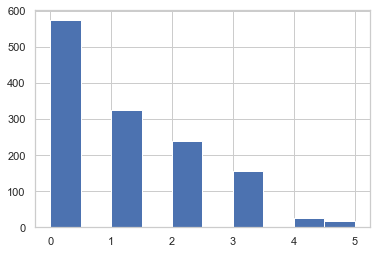

In [327]:
# histogram for women data with children
plt.hist(axis['children'])

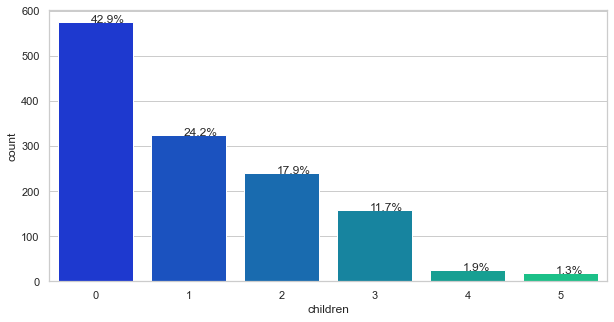

In [349]:
# detailed representation of women data with one, two, three... children count.
plt.figure(figsize=(10,5))
ax = sns.countplot(axis["children"],palette='winter')
perc_on_bar(ax,axis["children"])

the data shows 42.9% of people with no children are more likely having more isurance claims/charges

In [440]:
axis['children'].skew()

0.9383804401702414

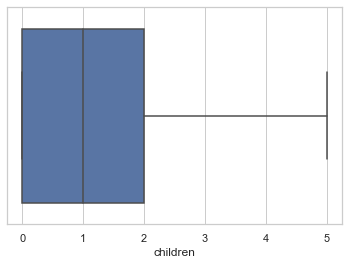

In [367]:
sns.boxplot(axis['children'])

### Observations on Charges

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

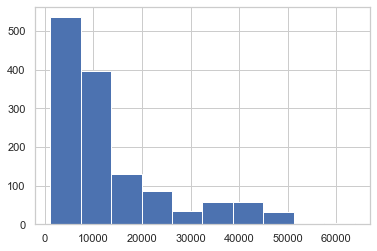

In [323]:
# charges graph using histogram
plt.hist(axis['charges'])

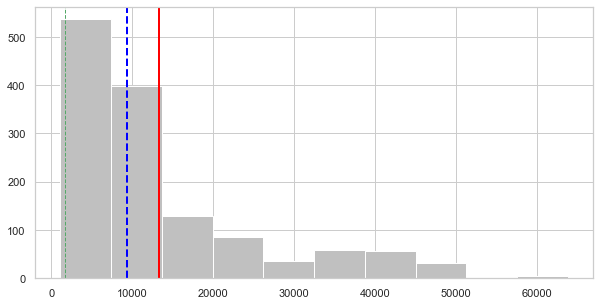

In [326]:
plt.figure(figsize=(10,5)) # makes the plot wider
plt.hist(axis['charges'], color='silver') # plots a simple histogram
plt.axvline(axis['charges'].mean(), color='red', linewidth=2)
plt.axvline(axis['charges'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(axis['charges'].mode()[0], color='g', linestyle='dashed', linewidth=1)

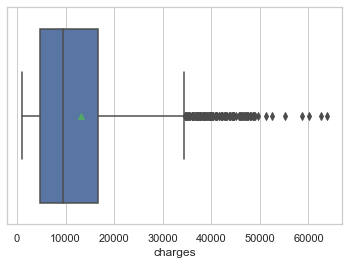

In [325]:
sns.boxplot(axis['charges'], showmeans=True)

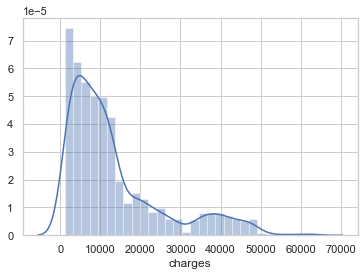

In [324]:
sns.distplot(axis['charges'])

## Multivariate Analysis

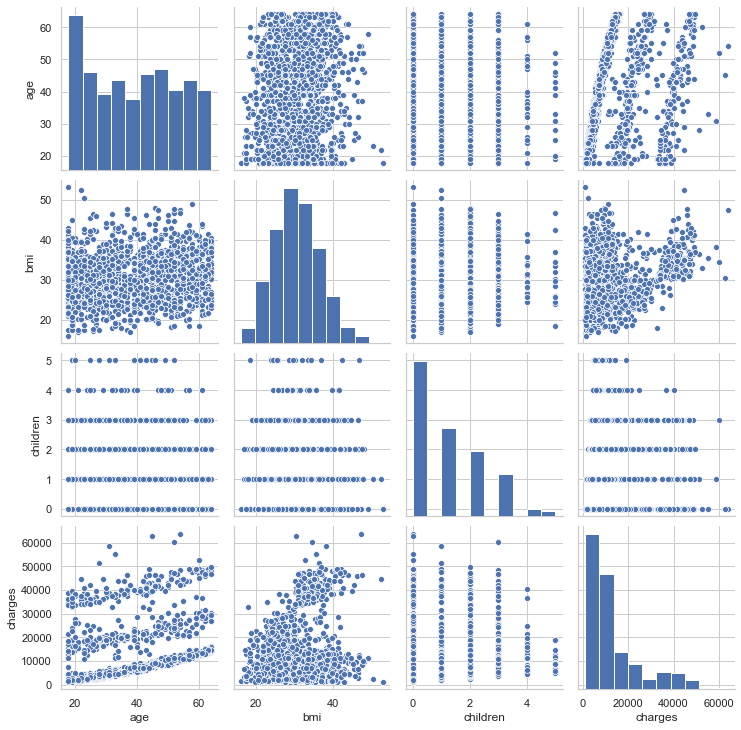

In [341]:
# plotting multi variate together using pairplot
sns.pairplot(axis)

In [342]:
# checking correlation of dataset
axis.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


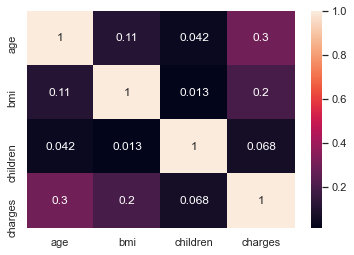

In [344]:
# visualize correlation using heatmap
sns.heatmap(axis.corr(), annot = True)

### Observation on Age vs Charges

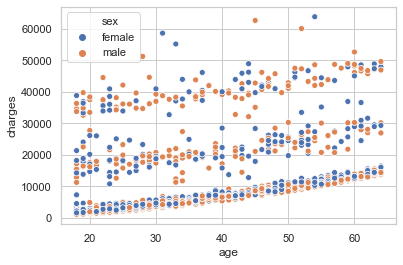

In [394]:
# plotting data using scatterplot to check how age and charges dependednt to each other
sns.scatterplot(axis['age'], axis['charges'], hue = axis['sex'])

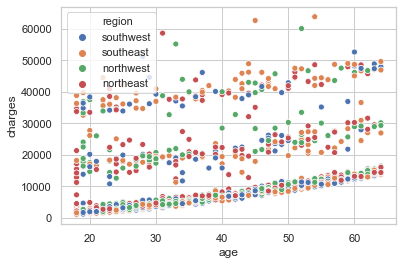

In [406]:
# differentiating age vs charges data with regions
sns.scatterplot(axis['age'], axis['charges'], hue = axis['region'])

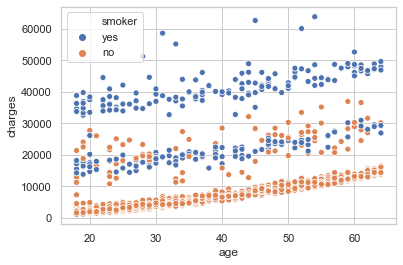

In [393]:
# differentiating age vs charges data with smoker and no smoker
sns.scatterplot(axis['age'], axis['charges'], hue = axis['smoker'])

this visualization shows people who smoke are paying more charges across all age groups compare to people who dont smoke.

### Observation on BMI vs Charges

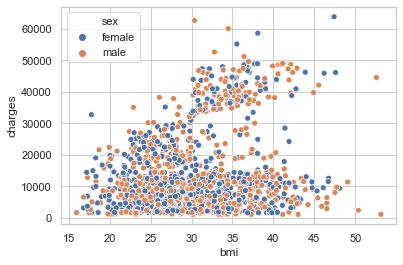

In [397]:
# differentiating bmi vs charges data with gender and checking for relationship
sns.scatterplot(axis['bmi'], axis['charges'], hue = axis['sex'])

unable to tell exactly that bmi effecting the charges in any gender.

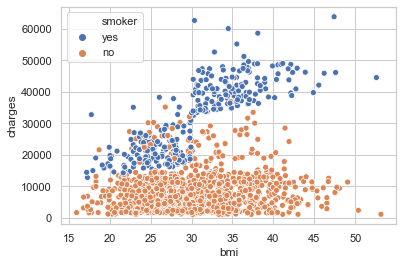

In [398]:
# differentiating bmi vs charges data with smoker and no smoker and checking for relationship
sns.scatterplot(axis['bmi'], axis['charges'], hue = axis['smoker'])

Now we can see people who smoke are paying more charges irrespective of their bmi

### Obervations on Region vs Charges

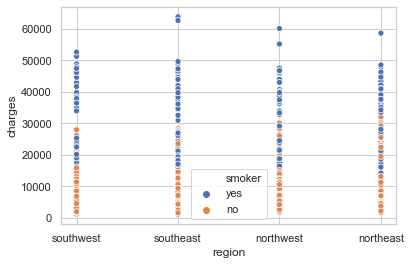

In [408]:
# differentiating regions vs charges data with smoker and no smoker and checking for relationship
sns.scatterplot(axis['region'], axis['charges'], hue = axis['smoker'])

<ipython-input-464-b1d22f5e1192>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


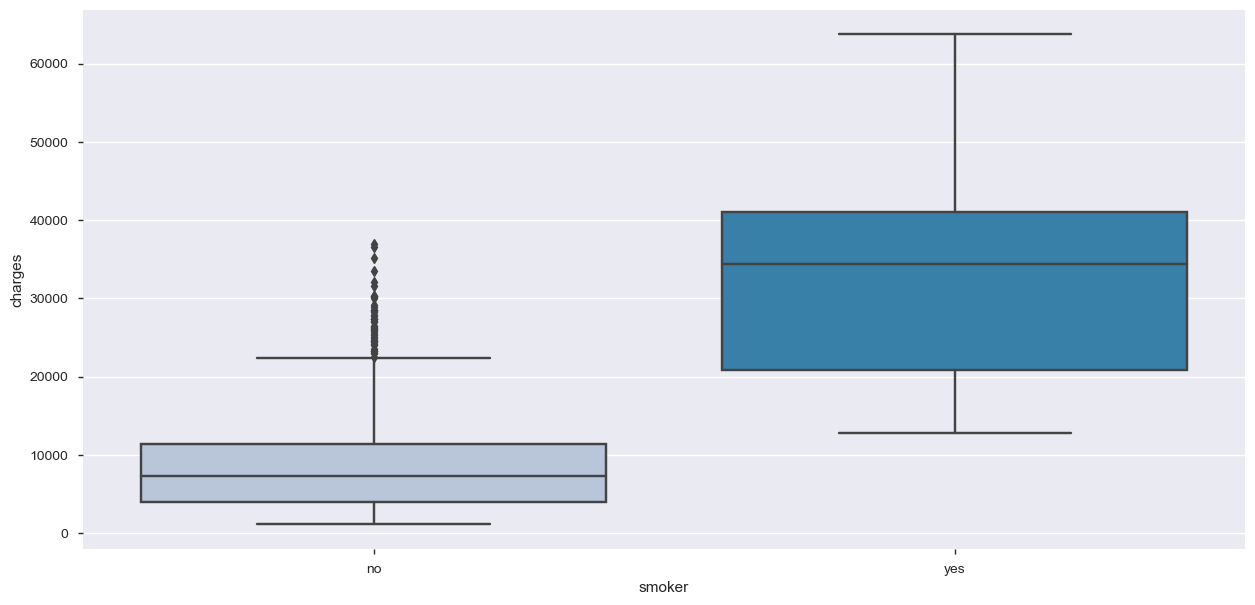

In [464]:
# view boxplots for smokers data
plt.figure(figsize=(15,7))
sns.boxplot(axis["smoker"],axis["charges"],palette="PuBu")
plt.show()

this shows non smokers are paying less than 20000 where as smokers are paying between 22000 and 40000.

### people with children vs charges

<ipython-input-463-78600230db1b>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


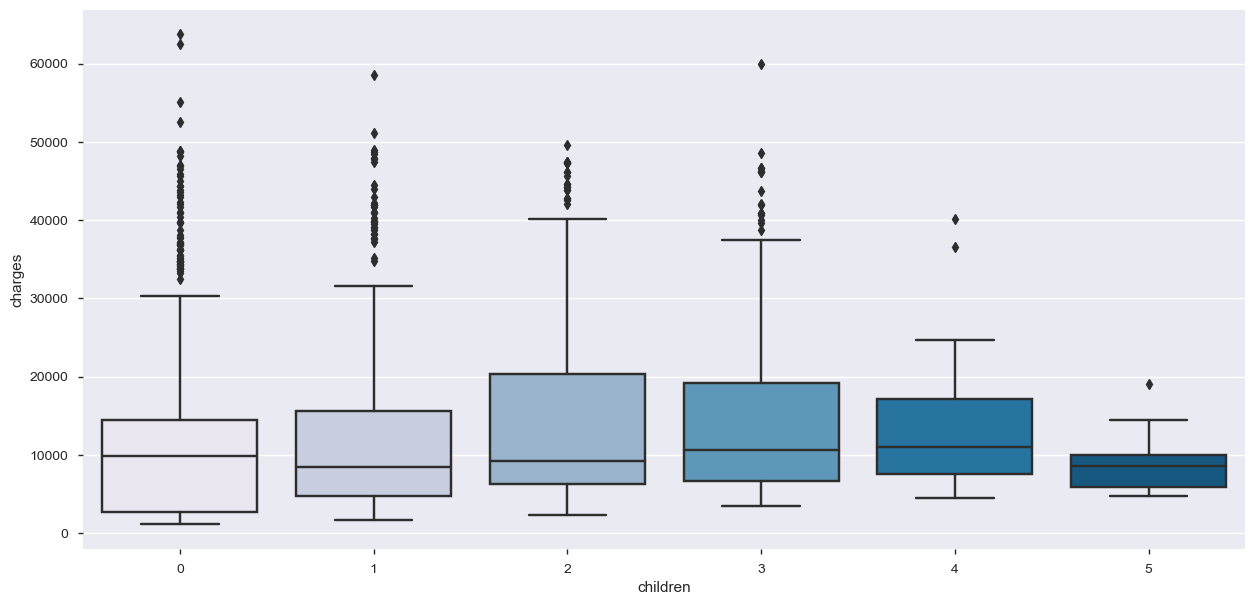

In [463]:
# view the distribution of data for women with children and charges
plt.figure(figsize=(15,7))
sns.boxplot(axis["children"],axis["charges"],palette="PuBu")
plt.show()

## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

In [253]:
# checking smoker and no smoker value counts
axis.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

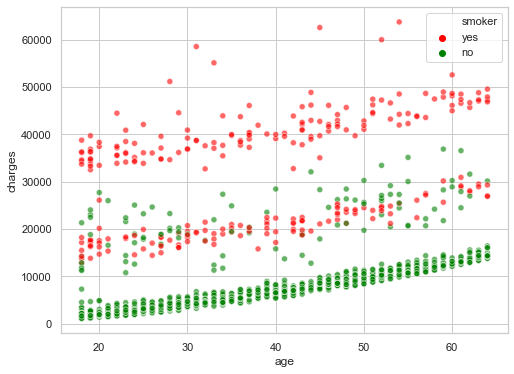

In [254]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(axis.age, axis.charges,hue=axis.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [255]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(axis[axis.smoker == 'yes'].charges) 
# Selecting charges corresponding to smokers as an array
y = np.array(axis[axis.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

8.271435842177219e-283


Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers.

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

In [293]:
# checking gender counts in dataset
axis.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [294]:
axis.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


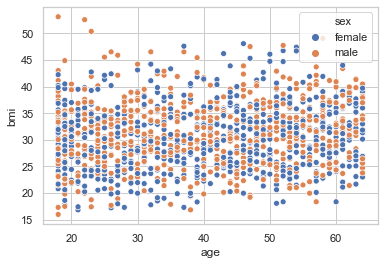

In [295]:
#representing with scatterplot
sns.scatterplot(axis.age, axis.bmi,hue=axis.sex  )
plt.show()

In [296]:
###### Check dependency of bmi on gender.#Performing an Independent t-test
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(axis[axis.sex == 'male'].bmi)  
y = np.array(axis[axis.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


Accepting nullhypothesis as pvalue >0.05. Hence,Gender has no impact on bmi.

## Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

In [297]:
axis.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

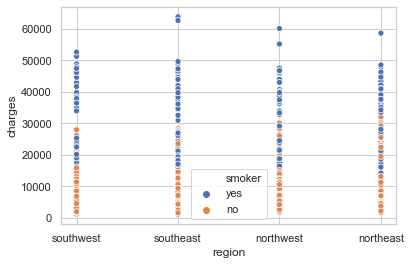

In [298]:
#representing with scatterplot
sns.scatterplot(axis['region'], axis['charges'], hue=axis['smoker']) 

In [299]:
# We will perform Chi_square test to check the proportion of smokers differs across regions.
Ho = "proportion of smokers are same across different regions" 
Ha = "proportion of smokers different across different regions"   

crosstab = pd.crosstab(axis['smoker'],axis['region']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.06171954839170547


Accepting nullhypothesis as pvalue >0.05. Hence,proportion of smokers are same across different regions.

## Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [300]:
women = axis[axis['sex'] == 'female']

In [302]:
women

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [303]:
# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

women = axis[axis['sex'] == 'female']

zero = women[women.children == 0]['bmi']
one = women[women.children == 1]['bmi']
two = women[women.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


Accepting the null hypothesis.Hence,it tells the number of children is not affecting any difference in women bmi.